## Dependencies and Data

Here as always our work is to get the dependencies and data for the temperature and humidity values of Seaged.
There is a lot of data values in the original dataset but here we are intereted only in the temperature and humidity values and also get the prediction of humidity for given temperature.
we'll see the multivariate regression case in the next file.

In [1]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('weatherHistory-data.csv')

data=dataset[["Temperature (C)","Humidity"]]
print(data.head())

   Temperature (C)  Humidity
0         9.472222      0.89
1         9.355556      0.86
2         9.377778      0.89
3         8.288889      0.83
4         8.755556      0.83


In [2]:
data=data.values

print(data)

[[ 9.47222222  0.89      ]
 [ 9.35555556  0.86      ]
 [ 9.37777778  0.89      ]
 ...
 [22.03888889  0.56      ]
 [21.52222222  0.6       ]
 [20.43888889  0.61      ]]


## Getting Data values for training and testing

We consider the n-20 values, where n is the number of temperature data elements is taken as temperature value for training in the form of temperature_train and last 20 values from the whole data of temperature values and take that as temperature_test for testing purposes. The data is reshaped into column vector

In [3]:
temperature=data[:,0]
temperature=temperature.reshape(len(temperature),1)
temperature_train=temperature[:-20]
temperature_test=temperature[-20:]
print(temperature_train)

[[ 9.47222222]
 [ 9.35555556]
 [ 9.37777778]
 ...
 [16.62222222]
 [16.14444444]
 [15.59444444]]


Same we do here for humidity data..instead we take n-20 values as humidity_train and last 20 as humidity_test. Similarly humidity data is also reshaped into a column vector

In [4]:
humidity=data[:,1]
humidity=humidity.reshape(len(humidity),1)
humidity_train=humidity[:-20]
humidity_test=humidity[-20:]
print(humidity_train)

[[0.89]
 [0.86]
 [0.89]
 ...
 [0.87]
 [0.87]
 [0.87]]


## Load Data to Linear regression model

Firstly we use Linear regression model to ge the values for humidity corresponding to the temperature_test data.
As we all know linear regression fits a straight line through the data and to get a straight line you need two components, the slope, given by the model.coef_ and the intercept, given by model.intercept_.

In [5]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(temperature_train,humidity_train)

pred=model.predict(temperature_test)
print(pred)

print("The slope of  the line is : ",model.coef_)
print("The intercepts of the line is : ",model.intercept_)

[[0.69508341]
 [0.69501154]
 [0.70981624]
 [0.68135672]
 [0.63622395]
 [0.60287744]
 [0.59339094]
 [0.53905913]
 [0.51584594]
 [0.4883207 ]
 [0.48961432]
 [0.48717082]
 [0.48717082]
 [0.49126727]
 [0.51620528]
 [0.55271395]
 [0.57125576]
 [0.60417106]
 [0.61085473]
 [0.62486889]]
The slope of  the line is :  [[-0.01293614]]
The intercepts of the line is :  [0.8892693]


## Visualization

Using matplotlib's pyplot module we can plot the validation of our model. The scatter plot is used to find the (temperature,humidity) points and then we draw our trained regression line on it.

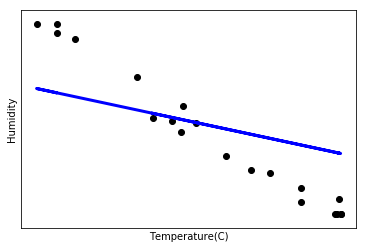

In [7]:
import matplotlib.pyplot as plt


plt.scatter(temperature_test, humidity_test,  color='black')
plt.plot(temperature_test,pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.ylabel("Humidity")
plt.xlabel("Temperature(C)")

plt.show()

## Evaluating Linear regression model

We will find the mean squared error and the R-squared score of the linear regression model. Detailed explaination regarding both the metrics are given in the README.md file. Kindly go through those.

In [8]:
from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error is : ",mean_squared_error(humidity_test,pred))
print("r2 score is : ",r2_score(humidity_test,pred))

Mean squared error is :  0.024970952601698654
r2 score is :  0.5191675272020324


## Load data into Support Vector Regression model

Now that we have seen how the Linear regression model performs on the single variable temperature vs humidity. Now we'll see how would a support vector regression model(SVR) perform for the same variables.
Most of the times, your dataset will contain features highly varying in magnitudes, units and range.
If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.
Here we are using sklearn's in-built StandardScaler() function.

In [9]:
from sklearn.preprocessing import StandardScaler

temperature_scaled=StandardScaler()
temperature_train = temperature_scaled.fit_transform(temperature_train)
humidity_scaled = StandardScaler()
humidity_train = humidity_scaled.fit_transform(humidity_train)
temperature_test_scaled= StandardScaler()
temperature_test=temperature_test_scaled.fit_transform(temperature_test)
humidity_test_scaled=StandardScaler()
humidity_test=humidity_test_scaled.fit_transform(humidity_test)

In [10]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(temperature_train,humidity_train.ravel())
pred1=model1.predict(temperature_test)

print(pred1)

[ 1.08653698  1.08588646  1.2198944   0.96228691  0.55375785  0.25191472
  0.16604556 -0.32575057 -0.53586982 -0.7850205  -0.77331107 -0.79542888
 -0.79542888 -0.75834902 -0.5326172  -0.20215101 -0.03431583  0.26362415
  0.32412288  0.45097506]


In [11]:
from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error is : ",mean_squared_error(humidity_test,pred1))
print("r2 score is : ",r2_score(humidity_test,pred1))

Mean squared error is :  0.11827346939324541
r2 score is :  0.8817265306067545


Linear regression has lesser error compared to SVR but r-squared score is more for SVR than Linear regression